<a href="https://colab.research.google.com/github/JavZon/Tashkent_House_Price_Prediction/blob/main/Beginning_part_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

Importing **DataFrame**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


**Initial glance at df** (info, describe, isnull().sum() methods)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [4]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [5]:
df.shape

(7565, 7)

In [6]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

Values are complete and there are no NaN values in our dataset

But size and price columns are **object** (str) type and we change them to numeric type with the help of **astype()** method

In [7]:
print(df.at[32,'size'])
type(df.at[32,'size'])  # as we can see the type of value is str

42


str

There is value called - 'Площадьземли:1сот'  at 5347 index which means 100 (kv.m). We will change it

In [8]:
df[df['size']=='Площадьземли:1сот']  # as we can see it is in 5347 index
df.at[5347, 'size']=100

In [9]:
df['size']=df['size'].astype(float)  # we changed the type of 'size' column

In [10]:
df.info()  # 'size' column has been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 413.8+ KB


Endi **price** columnini int ga o'tkazamiz

In [11]:
print(df.at[3211, 'price'])
type(df.at[3211, 'price'])

73000


str

In [12]:
#df['price']=df['price'].astype(int) # buning ichida ham 'Договорная' degani bor ekan
ind=df[df['price']=='Договорная'].index  # 'Договорная' degan qiymatning indexini olamiz

In [11]:
df.describe()

,rooms,size,level,max_levels
count,7565.000000,7565.000000,7565.000000,7565.000000
mean,2.625644,113.267236,3.699273,6.038202
std,1.085201,1491.213517,2.237275,2.613271
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,66.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,70000.000000,19.000000,25.000000


But there are extraordinary values in **'size'** column

We can see it through **hist** graph

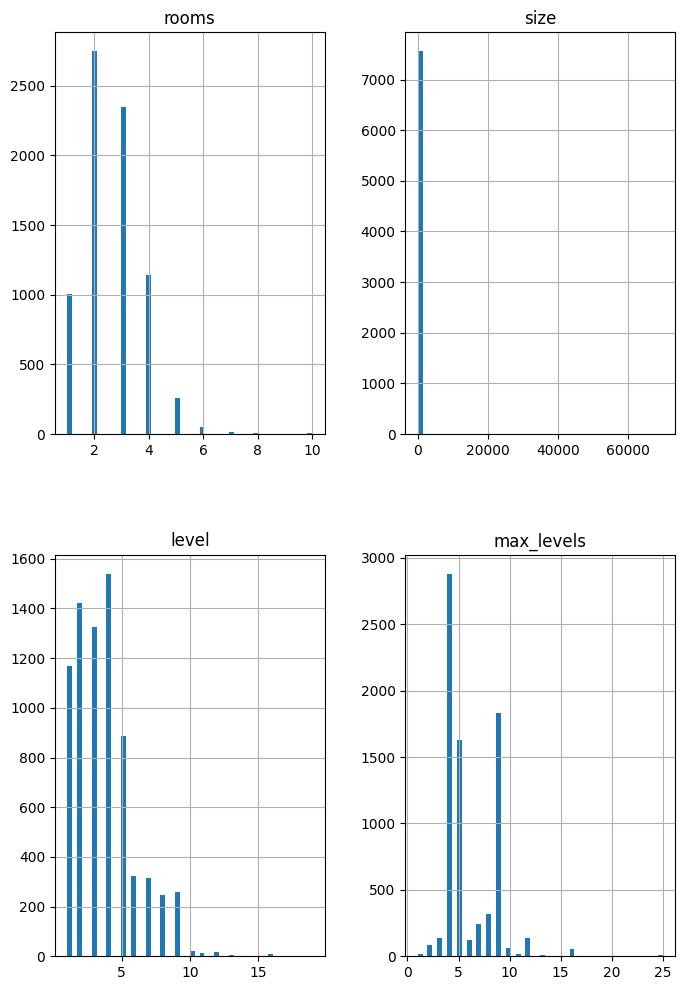

In [12]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df.hist(bins=50, figsize=(8,12))
plt.show()

In [13]:
df['rooms'].value_counts()

rooms
2     2746
3     2344
4     1140
1     1003
5      261
6       47
7       13
8        6
10       5
Name: count, dtype: int64

In [14]:
df['level'].value_counts()

level
4     1540
2     1422
3     1325
1     1168
5      887
6      324
7      315
9      258
8      248
10      22
12      19
11      15
16       9
13       6
15       2
18       2
14       2
19       1
Name: count, dtype: int64

In [15]:
df['max_levels'].value_counts()

max_levels
4     2880
9     1833
5     1631
8      321
7      240
12     136
3      134
6      119
2       84
10      66
16      52
11      20
1       16
13       8
25       6
18       5
17       5
23       4
19       2
22       1
14       1
20       1
Name: count, dtype: int64

In [16]:
df['district'].value_counts()

district
Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: count, dtype: int64

So we extract the **unusual** values ​​and apply a separate method to each one

In [26]:
len(df[df['size']<20])

41

In [21]:
df[df['size']>499]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000


The **size** of the house at index 981 is 7359.0, and the **price** is 46500. Let's compare the same with the 70 and 76 sq.m houses located in Mirabad **district**

In [24]:
df[(df['district']=='Мирабадский') & (df['size']>70) & (df['size']<76) & (df['rooms']==3) & (df['max_levels']==4)]

,location,district,rooms,size,level,max_levels,price
1814,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,3,75.0,2,4,75000
1981,"город Ташкент, Мирабадский район, Ул Нукус пос...",Мирабадский,3,75.0,3,4,75000
3515,"город Ташкент, Мирабадский район, Саракулька",Мирабадский,3,72.0,4,4,46000
3940,"город Ташкент, Мирабадский район, проспект Ами...",Мирабадский,3,75.0,4,4,70000
4233,"город Ташкент, Мирабадский район, 6-й проезд М...",Мирабадский,3,75.0,3,4,74000
4505,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,3,75.0,2,4,74000
4665,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,75.0,3,4,75000
5509,"город Ташкент, Мирабадский район, Саида Барака",Мирабадский,3,75.0,2,4,85000
5724,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,75.0,3,4,71000
6640,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,3,75.0,4,4,70000


As we can see, the house is located in **Qo'yliq** and we will release the houses in this place

In [44]:
df.at[7451, 'location']

'город Ташкент, Мирабадский район, Куйлюк 4-й квартал'

In [45]:
df[df['location']=='город Ташкент, Мирабадский район, Куйлюк 4-й квартал']

,location,district,rooms,size,level,max_levels,price
1880,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,61.00,2,4,39000
1929,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,4,92.00,2,5,55000
3520,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,56.00,3,5,40000
3678,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,56.00,3,5,38500
6875,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,68.00,3,9,33000
7451,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,3,74.00,4,4,42000
7456,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,3,77.98,2,4,60000


Demak uyning narxi 46500 to'g'ri lekin size ustuni

In [29]:
df['size'].value_counts()

size
60.00    379
70.00    377
50.00    337
65.00    255
80.00    252
        ... 
77.47      1
46.70      1
88.90      1
49.88      1
27.50      1
Name: count, Length: 406, dtype: int64

,location,district,rooms,size,level,max_levels,price
262,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000
741,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000
1675,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000
1696,"город Ташкент, Мирзо-Улугбекский район, Тимура...",Мирзо-Улугбекский,10,330.0,1,4,130000
1799,"город Ташкент, Шайхантахурский район, Хувайдо ...",Шайхантахурский,5,317.0,1,4,250000
1831,"город Ташкент, Сергелийский район, 7",Сергелийский,5,310.0,9,9,57500
1874,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000
1999,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,300.0,3,8,425000
2382,"город Ташкент, Мирзо-Улугбекский район, Ирригатор",Мирзо-Улугбекский,6,347.0,3,9,240000
2965,"город Ташкент, Яшнободский район, Садыка Азимова",Яшнободский,7,360.0,5,6,300000


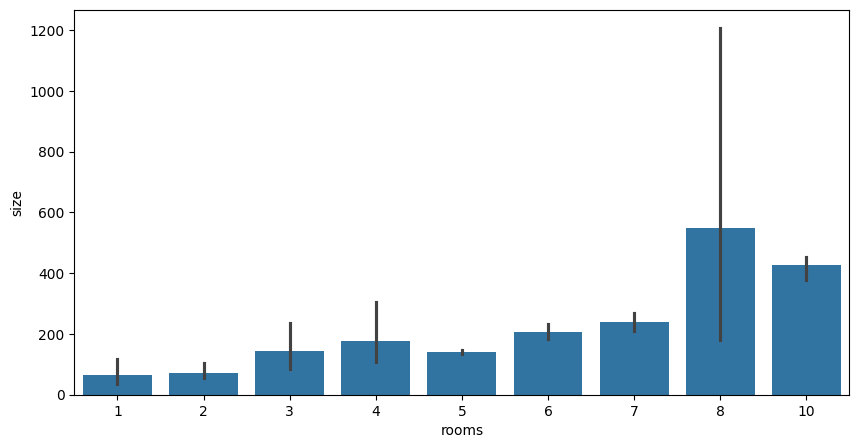

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='rooms',y='size')
plt.show()

In [18]:
df2=df.sample(15)

In [21]:
df2['price']=df2['price'].astype(int)
df2

,location,district,rooms,size,level,max_levels,price
3678,"город Ташкент, Мирабадский район, Куйлюк 4-й к...",Мирабадский,2,56.0,3,5,38500
1315,"город Ташкент, Юнусабадский район, Юнусабад 4-...",Юнусабадский,5,110.0,9,9,58000
59,"город Ташкент, Учтепинский район, Чиланзар 12-...",Учтепинский,3,98.0,2,4,68000
5997,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,43.0,4,4,62000
3094,"город Ташкент, Мирабадский район, Чехова",Мирабадский,3,105.0,7,8,95000
46,"город Ташкент, Учтепинский район, Гулистон",Учтепинский,4,78.0,2,4,65000
7438,"город Ташкент, Яккасарайский район, Хазинабог",Яккасарайский,2,55.0,4,4,37000
920,"город Ташкент, Учтепинский район, Чиланзар 12-...",Учтепинский,3,65.0,3,4,49000
5742,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,50.0,3,5,35500
1585,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,2,52.0,3,4,60000


In [23]:
df2.groupby('district')[['price']].mean()

,price
district,
Мирабадский,84466.666667
Мирзо-Улугбекский,62000.000000
Учтепинский,60666.666667
Чиланзарский,34500.000000
Юнусабадский,59000.000000
Яккасарайский,73000.000000
